# 1000 Genomes Project and PCA 

In [1]:
# This work uses data from the 1000 genomes project and uses PCA to find commonalities of SNPs
# within population, gender, and continential super-population

In [2]:
# import libraries
import pandas as pd
#opening a matplotlib notebook allows you to rotate plots in real time with mouse
%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook

import matplotlib.pyplot as plt

# look up doc for PCA and sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# load file matrix and store as dataframe sep by \t as seen in terminal 
df = pd.read_csv('/Users/cmdb/qbb2020-answers/day2-homework/matrix_1kg.txt', sep = "\t")

# load file with metadata - can just use URL - doesn't need download
df_metadata = pd.read_csv("ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/release/20130502/integrated_call_samples_v3.20130502.ALL.panel", sep = "\t")

In [4]:
# sum rows - horizontally (axis = 1) exclude first four columns 
alt_allele_counts = df.iloc[:,4:].sum(axis = 1)
# total chromosome is number of columns - first 4 times two (diploid)
total_chrom = 2*(len(df.columns)-4)
#alternative allele frequency is all alt allele counts divided by the total chrom
alt_allele_freq = alt_allele_counts.div(total_chrom)
# prints out dataframe - alt_allele_freq
print(alt_allele_freq)

0       0.000392
1       0.019231
2       0.003336
3       0.002159
4       0.000392
          ...   
9995    0.020604
9996    0.000196
9997    0.001374
9998    0.028846
9999    0.002551
Length: 10000, dtype: float64


In [5]:
# common variance is dataframe excludes rows that have frequencies outside 0.05-0.95
common_var = df.loc[(alt_allele_freq >= 0.05) & (alt_allele_freq<= 0.95)]
# only take first four
common_var = common_var.iloc[:,4:]

In [6]:
# tranpose common_var for pca input - want to have individuals in final plot (want these as rows)
pca_input = common_var.T
pca_input.shape

(2548, 986)

In [7]:
# use standard scaler and fit the transform
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca = PCA(n_components = 10) # run PCA and keep first ten reductions
# transform pca with standardized input
pca_output = pca.fit_transform(pca_input_standardized)
# save output in dataframe
pca_output_df = pd.DataFrame(data = pca_output,
                columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
# print (pca output df)
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.144930,-9.818567,-1.546029,-5.397911,-0.521605,-0.289080,0.138238,0.490828,-1.872050,4.707860
1,-6.133884,-8.631829,2.557894,-3.894345,0.332354,-2.104297,2.993003,3.864020,-2.575724,-1.925005
2,-6.238473,-7.971870,-0.745968,-4.014308,-0.941938,4.002026,-1.614494,-1.178138,1.897412,0.115562
3,-5.051218,-7.008727,2.805398,-4.762549,4.378714,0.538027,-1.254769,-1.291142,2.596865,-0.225664
4,-6.634383,-8.543670,3.071710,-1.593369,-4.375834,0.620588,-3.516548,-1.964229,1.290447,-0.604592
...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.666036,3.298194,-0.222226,-0.932367,2.571837,-3.137074,1.234856,0.167234
2544,-6.295888,-3.116491,-5.555481,3.334407,3.341542,3.717536,-1.965680,-3.349324,-2.056757,0.069726
2545,-4.096947,-2.827361,-4.179493,3.693306,1.578111,0.649731,-0.137415,-0.003714,1.228880,-2.947148
2546,-6.263462,-2.585080,-4.225008,3.893176,-3.921134,-1.599165,-0.870887,-0.326072,-0.522696,-2.638707


In [8]:
# add column to pca_output with samples
samples = df.iloc[:,4:].columns
pca_output_df['sample'] = samples
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,sample
0,-6.144930,-9.818567,-1.546029,-5.397911,-0.521605,-0.289080,0.138238,0.490828,-1.872050,4.707860,HG00096
1,-6.133884,-8.631829,2.557894,-3.894345,0.332354,-2.104297,2.993003,3.864020,-2.575724,-1.925005,HG00097
2,-6.238473,-7.971870,-0.745968,-4.014308,-0.941938,4.002026,-1.614494,-1.178138,1.897412,0.115562,HG00099
3,-5.051218,-7.008727,2.805398,-4.762549,4.378714,0.538027,-1.254769,-1.291142,2.596865,-0.225664,HG00100
4,-6.634383,-8.543670,3.071710,-1.593369,-4.375834,0.620588,-3.516548,-1.964229,1.290447,-0.604592,HG00101
...,...,...,...,...,...,...,...,...,...,...,...
2543,-6.304582,-0.169819,-2.666036,3.298194,-0.222226,-0.932367,2.571837,-3.137074,1.234856,0.167234,NA21137
2544,-6.295888,-3.116491,-5.555481,3.334407,3.341542,3.717536,-1.965680,-3.349324,-2.056757,0.069726,NA21141
2545,-4.096947,-2.827361,-4.179493,3.693306,1.578111,0.649731,-0.137415,-0.003714,1.228880,-2.947148,NA21142
2546,-6.263462,-2.585080,-4.225008,3.893176,-3.921134,-1.599165,-0.870887,-0.326072,-0.522696,-2.638707,NA21143


In [9]:
# merge pca_output_df and df_metadata
df_merge = pd.merge(pca_output_df, df_metadata, on = 'sample')

<IPython.core.display.Javascript object>


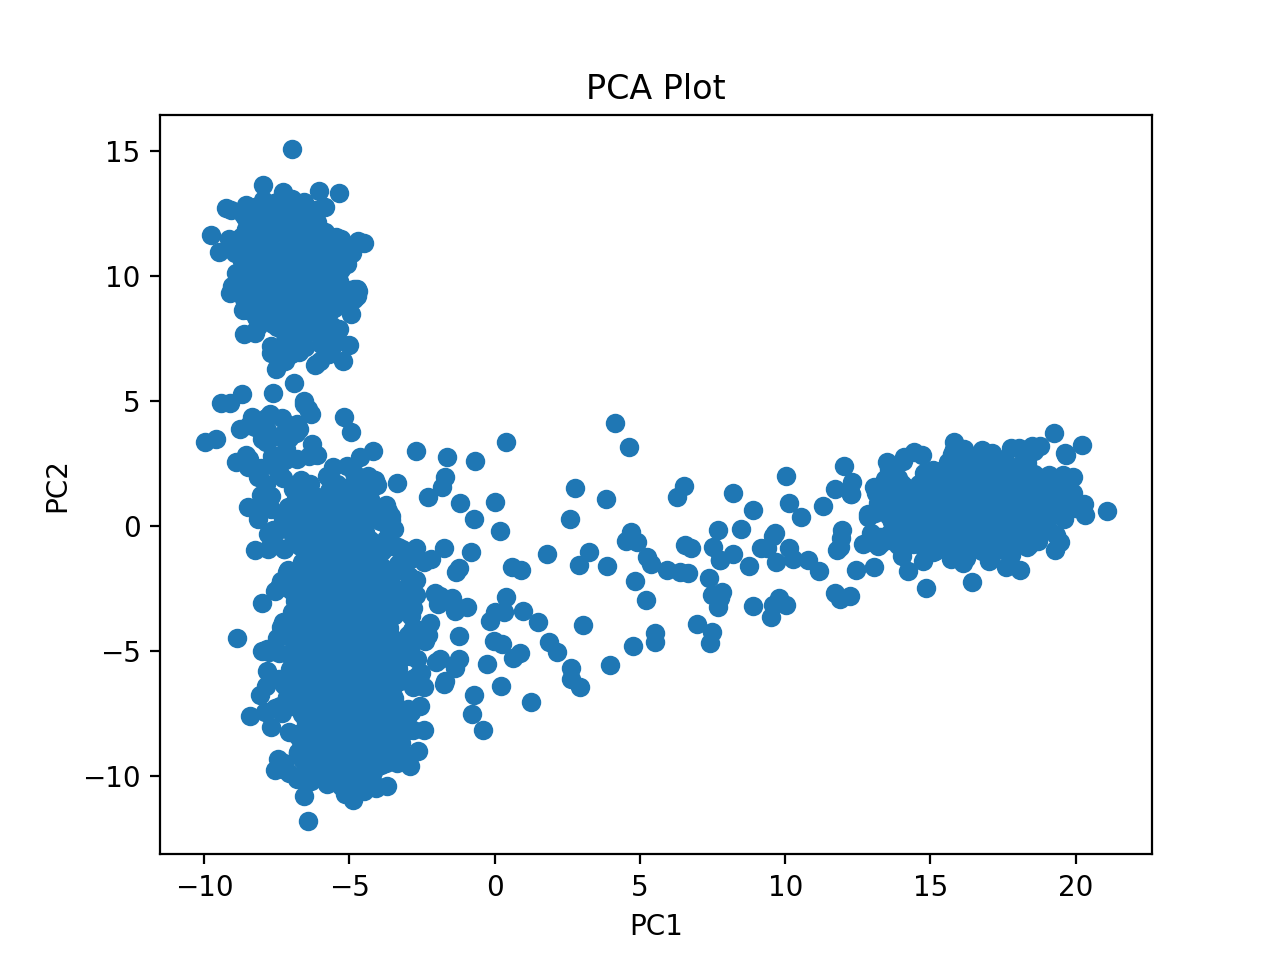

In [10]:
# plot pca output PC1 and PC2
fx, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])

plt.title("PCA Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

<IPython.core.display.Javascript object>


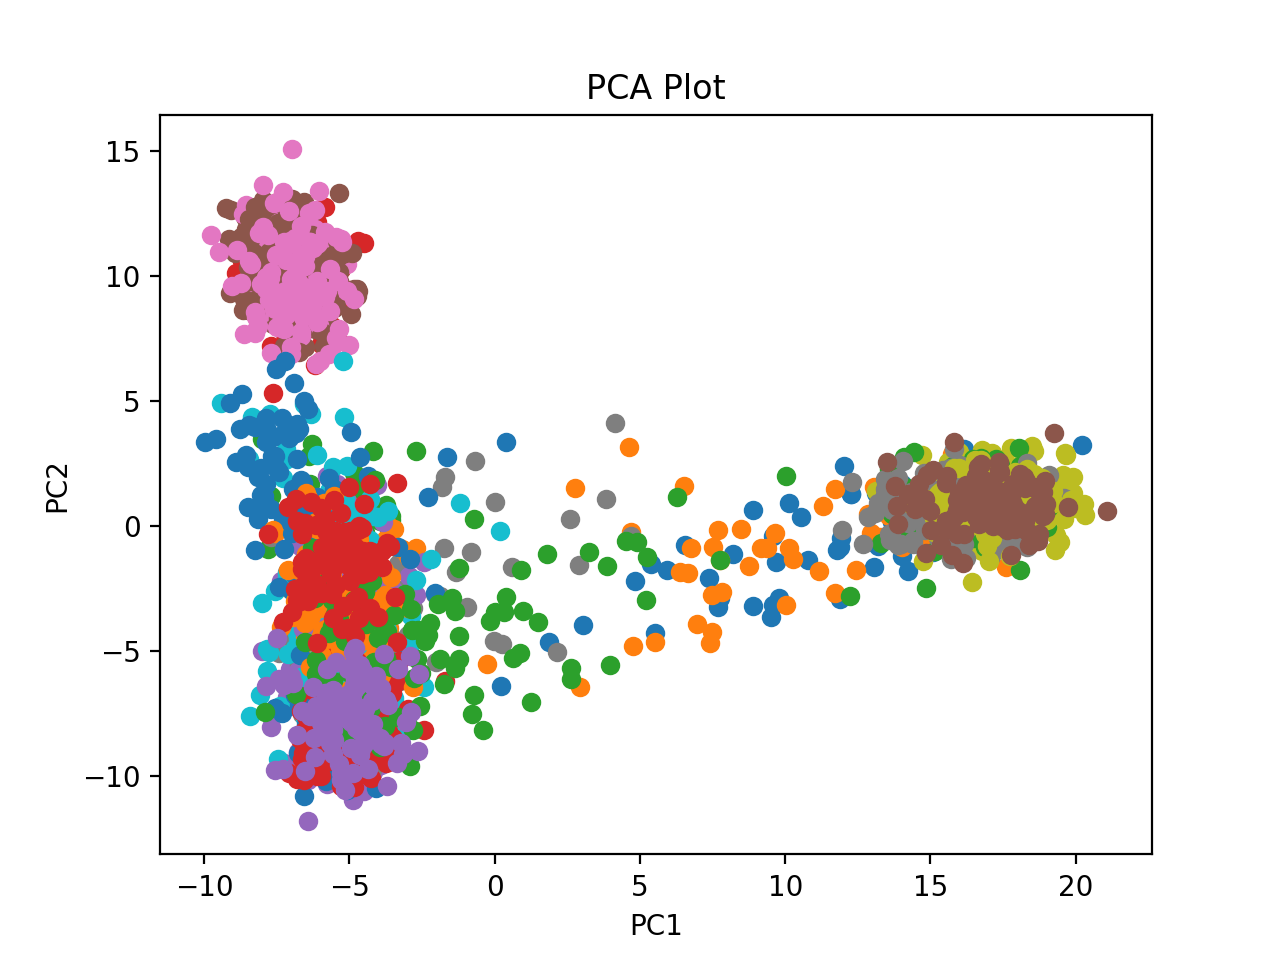

In [11]:
# group data by descriptive column in metadata file 
fx, ax = plt.subplots()
groups = df_merge.groupby("pop") #pandas groupby func groups by 'pop' in df_merge
for name, group in groups:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol =2)
plt.title("PCA Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

<IPython.core.display.Javascript object>


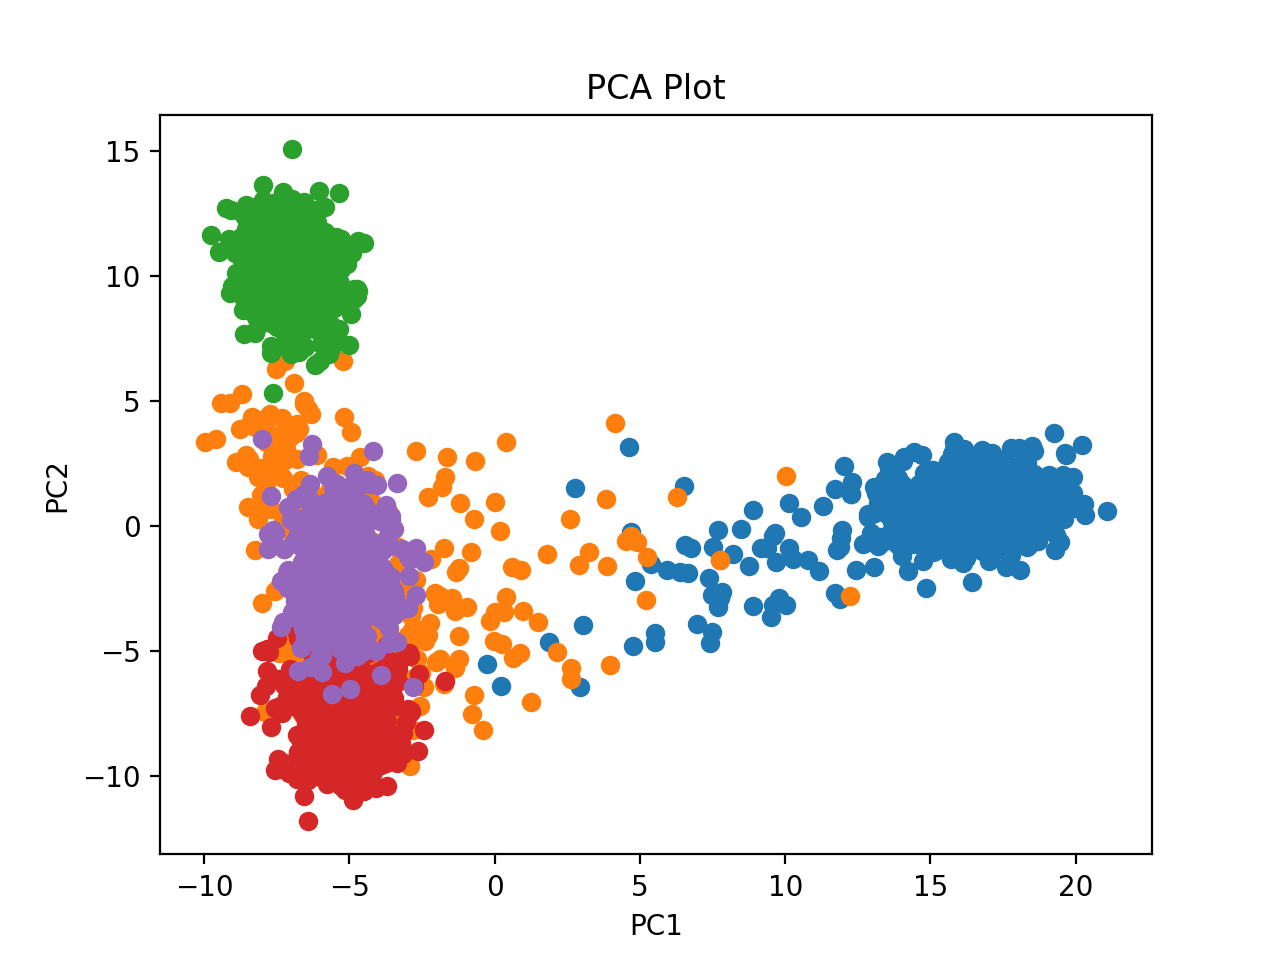

In [12]:
# group data by descriptive column in metadata file 
fx, ax = plt.subplots()
groups = df_merge.groupby("super_pop") #pandas groupby func groups by 'super_pop' in df_merge
for name, group in groups:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol =2)
plt.title("PCA Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

<IPython.core.display.Javascript object>


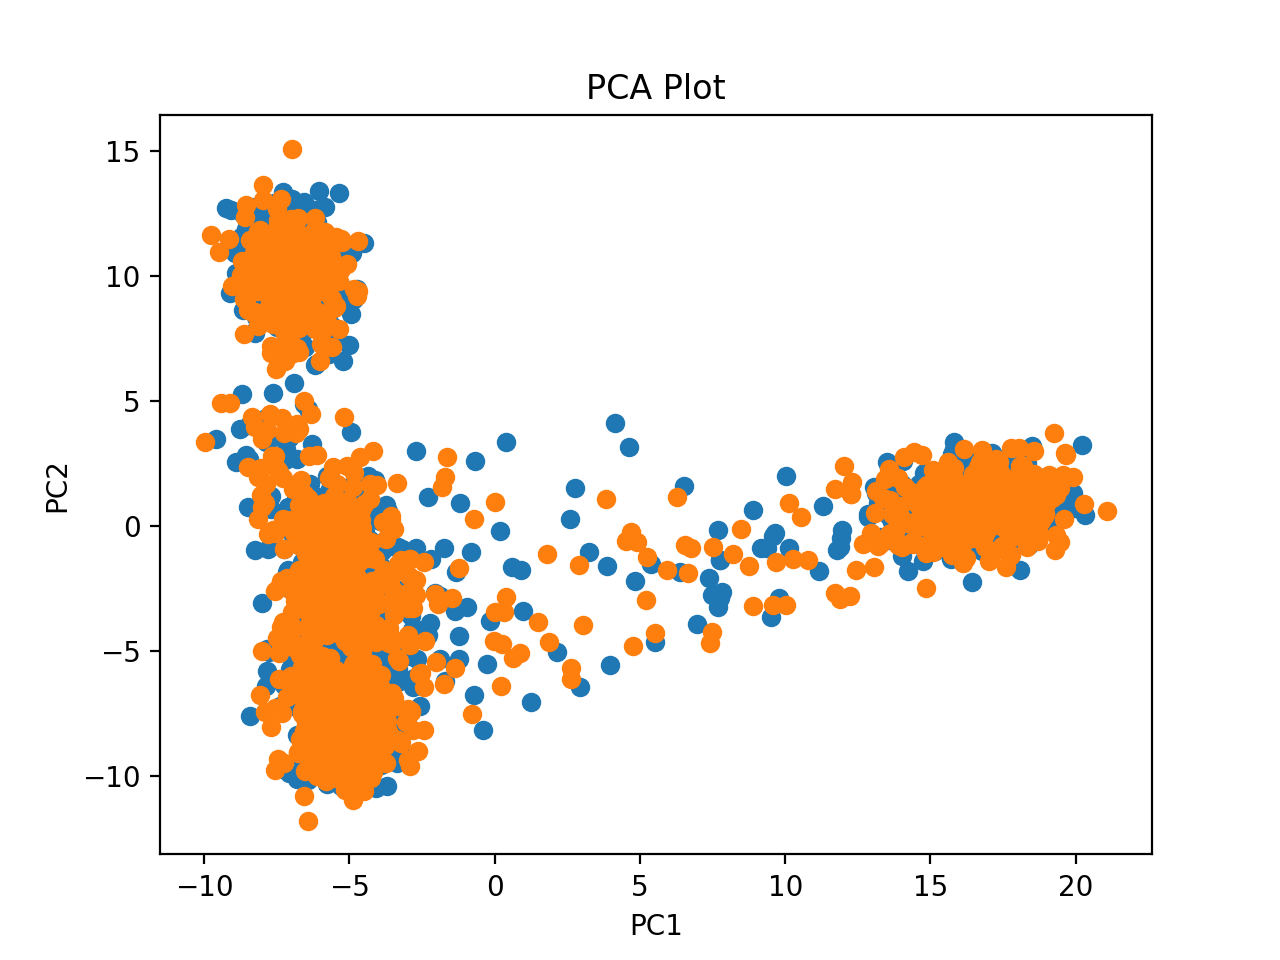

In [13]:
# group data by descriptive column in metadata file 
fx, ax = plt.subplots()
groups = df_merge.groupby("gender") #pandas groupby func groups by 'gender' in df_merge
for name, group in groups:
    ax.scatter(x = group['PC1'], y = group['PC2'], label = name)
plt.legend(bbox_to_anchor = (1.7, 1), loc = 'upper right', ncol =2)
plt.title("PCA Plot")
plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()

<IPython.core.display.Javascript object>


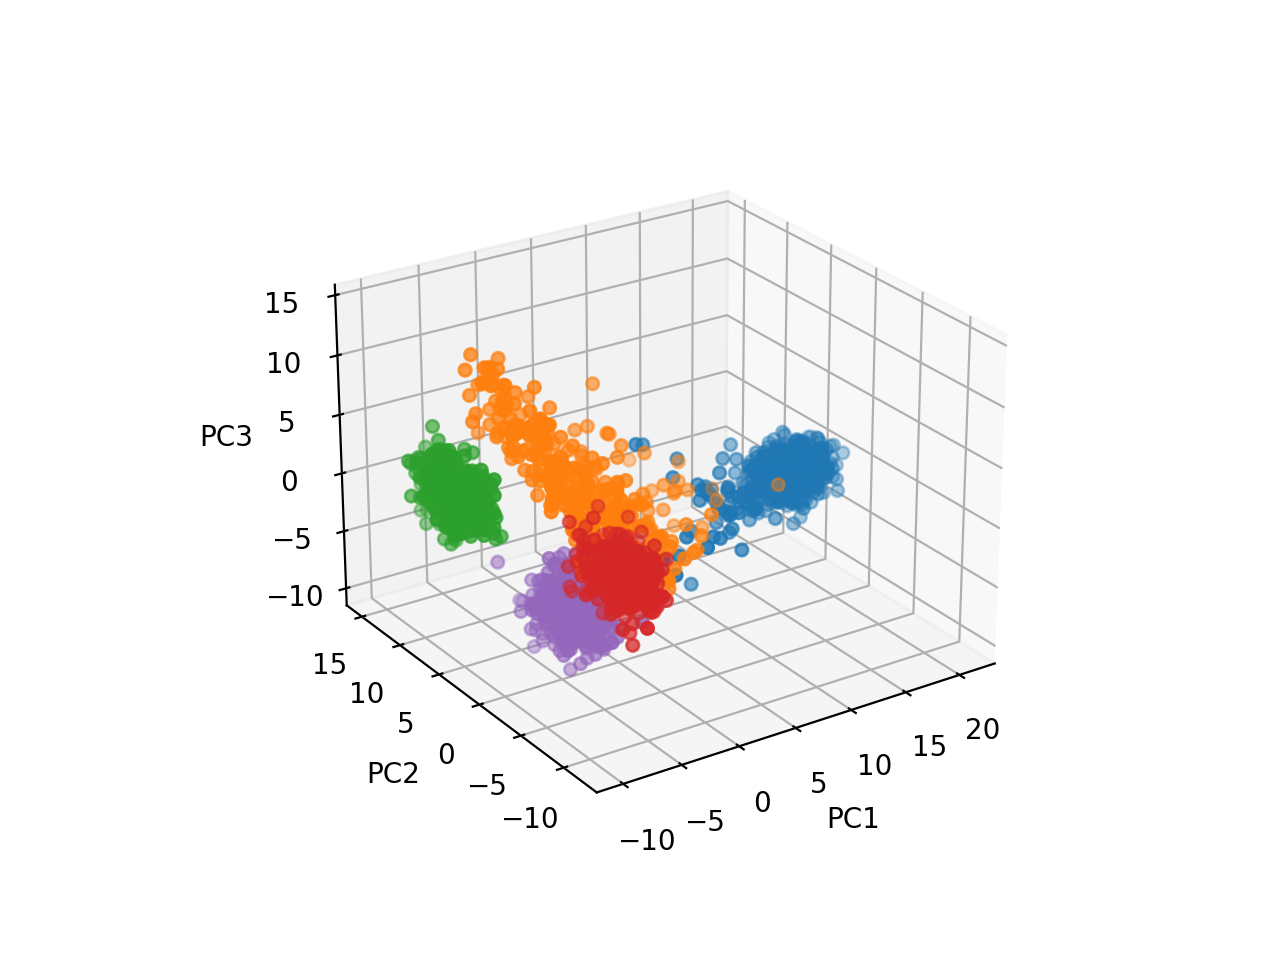

In [16]:
# try 3D plotting # from https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
groups = df_merge.groupby("super_pop") #pandas groupby func groups by 'gender' in df_merge
for name, group in groups:
    ax.scatter(xs = group['PC1'], ys = group['PC2'], zs = group['PC3'])
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')